In [1]:
#Pearson Correlation Score 
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#
dataset={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5,'The Night Listener': 3.0},
        'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5,'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0,'You, Me and Dupree': 3.5},
        'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,'Superman Returns': 3.5, 'The Night Listener': 4.0},
        'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,'The Night Listener': 4.5, 'Superman Returns': 4.0,'You, Me and Dupree': 2.5},
        'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,'You, Me and Dupree': 2.0},
        'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
        'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}



In [3]:
data=pd.DataFrame(dataset).fillna(0)
data


,Claudia Puig,Gene Seymour,Jack Matthews,Lisa Rose,Michael Phillips,Mick LaSalle,Toby
Just My Luck,3.0,1.5,0.0,3.0,0.0,2.0,0.0
Lady in the Water,0.0,3.0,3.0,2.5,2.5,3.0,0.0
Snakes on a Plane,3.5,3.5,4.0,3.5,3.0,4.0,4.5
Superman Returns,4.0,5.0,5.0,3.5,3.5,3.0,4.0
The Night Listener,4.5,3.0,3.0,3.0,4.0,3.0,0.0
"You, Me and Dupree",2.5,3.5,3.5,2.5,0.0,2.0,1.0


# Ecludiean Distance

In [4]:
#now finding the similarity between any two person using Ecludiean distance
def get_similarity(data,p1,p2):
    #for finding the similarity between tow person 
    #we need to find the simiilar item between them. Similar item mean ..rate score against same movie
    
    p1=[score for key,score in data[p1].items()]
    p2=[score for key,score in data[p2].items()]
    
    sum_of_square=sum(pow(p1[index]-p2[index],2) for index in range(len(p1)) if p2[index]!=0 and p1[index]!=0)
        
    return 1/(1+sum_of_square)

In [5]:
get_similarity(data,"Gene Seymour","Toby")

0.10810810810810811

# Ranking List : Eculidean distance 

In [6]:
#lets i want find the distance between Lisa Rose and every other person

ranking={}
names=list(data.columns)
for person in names:
    ranking[person]=get_similarity(data,"Lisa Rose",person)

sortedlist=sorted(ranking,key=ranking.get,reverse=True)

for key in sortedlist:
    print("%20s %20f"%(key,ranking[key]))

    

           Lisa Rose             1.000000
    Michael Phillips             0.444444
        Mick LaSalle             0.333333
        Claudia Puig             0.285714
                Toby             0.222222
       Jack Matthews             0.210526
        Gene Seymour             0.148148


# Pearson correlation

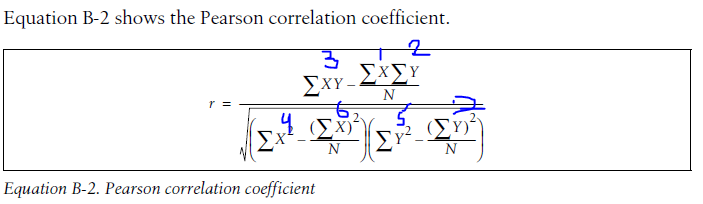

In [7]:
from IPython.display import Image
Image(filename='E:/teturial/picture/pearson_distance.png',width=800,height=400)


In [8]:
def sim_correlation(data,p1,p2):
    #finding x and y
    list_p1=list(data[p1])
    list_p2=list(data[p2])
    
    #finding step1 and 2
    sum1=sum(list_p1[index] for index in range(len(list_p1)) if list_p2[index]!=0)
    sum2=sum(list_p2[index] for index in range(len(list_p2)) if list_p1[index]!=0)
    
    #doing step 3
    pSum=sum([list_p1[index]*list_p2[index] for index in range(len(list_p1)) if list_p1[index]!=0 and list_p2[index]!=0])
    
    #doing Step 5 and 6
    sum1sqr=sum([pow(list_p1[index],2) for index in range(len(list_p1)) if list_p1[index]!=0 and list_p2[index]!=0])
    sum2sqr=sum([pow(list_p2[index],2) for index in range(len(list_p2)) if list_p1[index]!=0 and list_p2[index]!=0])
    
    #n-of nummerator
    n=([index for index in range(len(list_p1)) if list_p1[index]!=0 and list_p2[index]!=0])
    n=len(n)
    
    #nummerator
    num=pSum-(sum1*sum2/n)
    
    #Denamuerator
    den=math.sqrt(sum1sqr-pow(sum1,2)/n)*math.sqrt(sum2sqr-pow(sum2,2)/n)
    
    r=num/den
    return r
    

In [9]:
sim_correlation(data,"Lisa Rose","Gene Seymour")

0.39605901719066977

# Rakning for pearson Correlation score

In [10]:
#lets i want find the distance between Lisa Rose and every other person

ranking={}
names=list(data.columns)
for person in names:
    ranking[person]=sim_correlation(data,"Lisa Rose",person)

sortedlist=sorted(ranking,key=ranking.get,reverse=True)

for key in sortedlist:
    print("%20s %20f"%(key,ranking[key]))

    

           Lisa Rose             1.000000
                Toby             0.991241
       Jack Matthews             0.747018
        Mick LaSalle             0.594089
        Claudia Puig             0.566947
    Michael Phillips             0.404520
        Gene Seymour             0.396059


In [11]:
#lets i want find the distance between Lisa Rose and every other person

ranking={}
names=list(data.columns)
for person in names:
    ranking[person]=get_similarity(data,"Lisa Rose",person)

sortedlist=sorted(ranking,key=ranking.get,reverse=True)

for key in sortedlist:
    print("%20s %20f"%(key,ranking[key]))



           Lisa Rose             1.000000
    Michael Phillips             0.444444
        Mick LaSalle             0.333333
        Claudia Puig             0.285714
                Toby             0.222222
       Jack Matthews             0.210526
        Gene Seymour             0.148148


#                                 PART 2


# Recommendation item ..Similarity between person and item 

In [12]:
def get_getrecommendationitem(data,person):
    totals={}
    simSum={}
    names=list(data.columns)
    movies=list(data.transpose().columns)

    for other in names:
        if other==person:
            continue
        sim=sim_correlation(data,person,other)
        
        if sim<=0:
            continue
        
        for item in movies:
            if data[person][item]==0 and data[other][item]!=0:
                totals.setdefault(item,0)
                totals[item]+=data[other][item]*sim
                simSum.setdefault(item,0)
                simSum[item]+=sim
    ranking=[(total/simSum[item],item) for item,total in totals.items()]
              
    ranking.sort()
    ranking.reverse()
    return ranking
        

In [13]:
get_getrecommendationitem(data,"Toby")

[(3.3477895267131013, 'The Night Listener'),
 (2.8325499182641622, 'Lady in the Water'),
 (2.5309807037655645, 'Just My Luck')]